In [1]:
# !nvidia-smi

In [20]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

1.12.1+cu113


In [21]:
scalar=torch.tensor(7)

In [22]:
scalar

tensor(7)

In [23]:
scalar.ndim

0

In [24]:

vector=torch.tensor([1,3])

In [25]:
vector

tensor([1, 3])

In [26]:
vector.ndim

1

In [27]:
MATRIX = torch.tensor([[7, 8], 
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [28]:
MATRIX.ndim

2

In [29]:
rand_tensor=torch.rand(size=(2,3,4))

In [30]:
rand_tensor

tensor([[[0.9561, 0.7434, 0.1044, 0.4741],
         [0.9723, 0.3435, 0.7551, 0.5486],
         [0.4067, 0.1163, 0.4418, 0.9600]],

        [[0.1055, 0.2599, 0.6638, 0.7991],
         [0.1312, 0.7812, 0.8177, 0.4699],
         [0.5458, 0.1843, 0.0463, 0.2906]]])

In [31]:
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [32]:
# random_image_size_tensor

In [33]:

float_32_tensor = torch.tensor([3.0, 6.0, 9.0],dtype=None,device=None, requires_grad=False) 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [34]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

In [35]:
tensor * tensor

tensor([1, 4, 9])

In [36]:
torch.matmul(tensor, tensor)

tensor(14)

In [37]:
tensor@tensor

tensor(14)

In [38]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [39]:

torch.mm(tensor_A.T,tensor_B)

tensor([[ 76., 103.],
        [100., 136.]])

In [40]:
tensor_B.squeeze()

tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])

In [41]:
torch.stack([tensor_A,tensor_B]).view(12)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7., 10.,  8., 11.,  9., 12.])

In [42]:
import matplotlib.pyplot as plt


In [43]:
weight=0.7
bias=0.3

start=0
end=1

step=0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y= X*weight + bias

X[:10],y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [44]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [45]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test,test_labels=y_test, predictions=None):
  plt.figure(figsize=(16,10))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data,test_labels, c= 'r',s=4,label='Test labesl')

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})

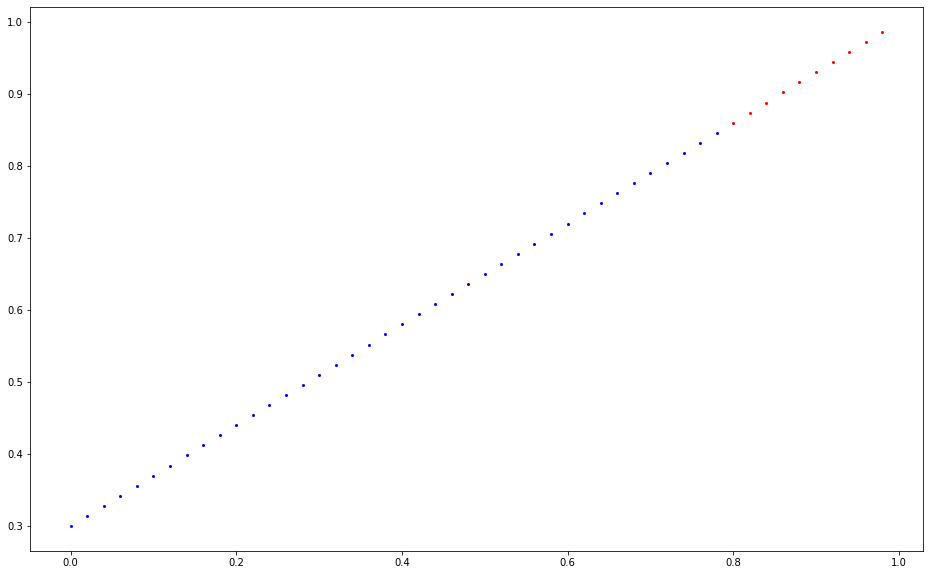

In [46]:

plot_predictions()

In [49]:
#building LR models using pytorch
import torch
from torch import nn 
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x: torch.tensor):
    return self.weights*x + self.bias



In [81]:
torch.manual_seed(42)
model_0=LinearRegression()
list(model_0.bias)

[tensor(0.1288, grad_fn=<UnbindBackward0>)]

In [51]:
model_0.bias

Parameter containing:
tensor([0.1288], requires_grad=True)

In [61]:
model_0.weights

Parameter containing:
tensor([0.3367], requires_grad=True)

In [58]:
model_0.parameters()

<generator object Module.parameters at 0x7f30ce46f850>

In [57]:
model_0.named_parameters()

<generator object Module.named_parameters at 0x7f30ce46fe50>

In [56]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [63]:
with torch.inference_mode():
  y_preds=model_0(X_test)

In [64]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [83]:

loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)



In [84]:
epochs_count=[]
train_loss=[]
test_loss_=[]

torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
  model_0.train()
  y_preds=model_0(X_train)
  loss=loss_fn(y_preds,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_preds=model_0(X_test)
    test_loss=loss_fn(test_preds,y_test.type(torch.float))
  
    if epoch%10==0:
      epochs_count.append(epoch)
      train_loss.append(loss.detach().numpy())
      test_loss_.append(test_loss.detach().numpy())
      print(f"epoch: {epoch}   'MAE train_loss '  {loss}  'MAE test_loss:' {test_loss}")




epoch: 0   'MAE train_loss '  0.31288138031959534  'MAE test_loss:' 0.48106518387794495
epoch: 10   'MAE train_loss '  0.1976713240146637  'MAE test_loss:' 0.3463551998138428
epoch: 20   'MAE train_loss '  0.08908725529909134  'MAE test_loss:' 0.21729660034179688
epoch: 30   'MAE train_loss '  0.053148526698350906  'MAE test_loss:' 0.14464017748832703
epoch: 40   'MAE train_loss '  0.04543796554207802  'MAE test_loss:' 0.11360953003168106
epoch: 50   'MAE train_loss '  0.04167863354086876  'MAE test_loss:' 0.09919948130846024
epoch: 60   'MAE train_loss '  0.03818932920694351  'MAE test_loss:' 0.08886633068323135
epoch: 70   'MAE train_loss '  0.03476089984178543  'MAE test_loss:' 0.0805937647819519
epoch: 80   'MAE train_loss '  0.03132382780313492  'MAE test_loss:' 0.07232122868299484
epoch: 90   'MAE train_loss '  0.02788739837706089  'MAE test_loss:' 0.06473556160926819


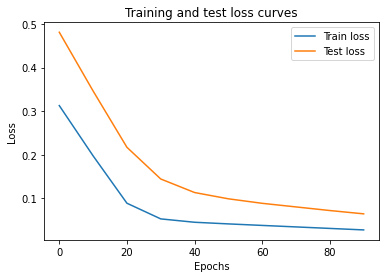

In [85]:
# Plot the loss curves
plt.plot(epochs_count, train_loss, label="Train loss")
plt.plot(epochs_count, test_loss_, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [88]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [89]:
epochs_count=[]
train_loss=[]
test_loss_=[]

torch.manual_seed(42)
epochs=250
for epoch in range(epochs):
  model_0.train()
  y_preds=model_0(X_train)
  loss=loss_fn(y_preds,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_preds=model_0(X_test)
    test_loss=loss_fn(test_preds,y_test.type(torch.float))
  
    if epoch%10==0:
      epochs_count.append(epoch)
      train_loss.append(loss.detach().numpy())
      test_loss_.append(test_loss.detach().numpy())
      print(f"epoch: {epoch}   'MAE train_loss '  {loss}  'MAE test_loss:' {test_loss}")




epoch: 0   'MAE train_loss '  0.024458957836031914  'MAE test_loss:' 0.05646304413676262
epoch: 10   'MAE train_loss '  0.021020207554101944  'MAE test_loss:' 0.04819049686193466
epoch: 20   'MAE train_loss '  0.01758546568453312  'MAE test_loss:' 0.04060482233762741
epoch: 30   'MAE train_loss '  0.014155393466353416  'MAE test_loss:' 0.03233227878808975
epoch: 40   'MAE train_loss '  0.010716589167714119  'MAE test_loss:' 0.024059748277068138
epoch: 50   'MAE train_loss '  0.0072835334576666355  'MAE test_loss:' 0.016474086791276932
epoch: 60   'MAE train_loss '  0.0038517764769494534  'MAE test_loss:' 0.008201557211577892
epoch: 70   'MAE train_loss '  0.008932482451200485  'MAE test_loss:' 0.005023092031478882
epoch: 80   'MAE train_loss '  0.008932482451200485  'MAE test_loss:' 0.005023092031478882
epoch: 90   'MAE train_loss '  0.008932482451200485  'MAE test_loss:' 0.005023092031478882
epoch: 100   'MAE train_loss '  0.008932482451200485  'MAE test_loss:' 0.005023092031478882
ep

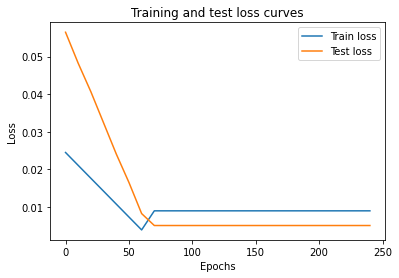

In [90]:
# Plot the loss curves
plt.plot(epochs_count, train_loss, label="Train loss")
plt.plot(epochs_count, test_loss_, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [94]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)

# plot_predictions(y_preds)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

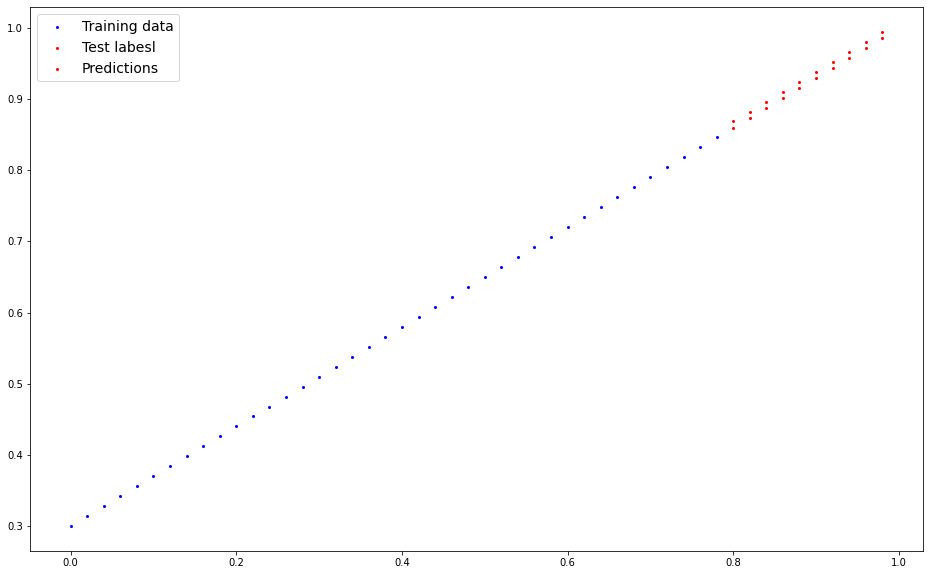

In [95]:
plot_predictions(predictions=y_preds)

In [96]:
#save the model

from pathlib import Path

model_path=Path('Model')

model_path.mkdir(parents=True,exist_ok=True)

model_name='pytorch_1.pth'
model_save_path=model_path/model_name

torch.save(obj=model_0.state_dict(),f=model_save_path)